In [1]:
from tqdm import tqdm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv(r"C:\Users\Robyi\Documents\Data Science Dataset\elecproduction.csv", parse_dates=['DATE'])
df.columns = ['Date', 'Electricity']
df = df.sort_values('Date').set_index('Date').asfreq('MS').interpolate()
df.head()

,Electricity
Date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


In [3]:
window_size = 12
test_size = 24

In [4]:
history = [x for x in df['Electricity'].iloc[:-test_size]]
predictions = []

for i in tqdm(range(test_size)):
    window = history[-window_size:]
    pred = np.mean(window)
    predictions.append(pred)
    history.append(pred)

100%|██████████| 24/24 [00:00<00:00, 23938.95it/s]


In [5]:
actuals = df['Electricity'].iloc[-test_size:].values
mae = mean_absolute_error(actuals, predictions)
rmse = np.sqrt(mean_squared_error(actuals, predictions))
mape = np.mean(np.abs((actuals - predictions)/actuals)) * 100

print(f"MAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2f}%")

MAE: 8.48, RMSE: 10.16, MAPE: 8.21%


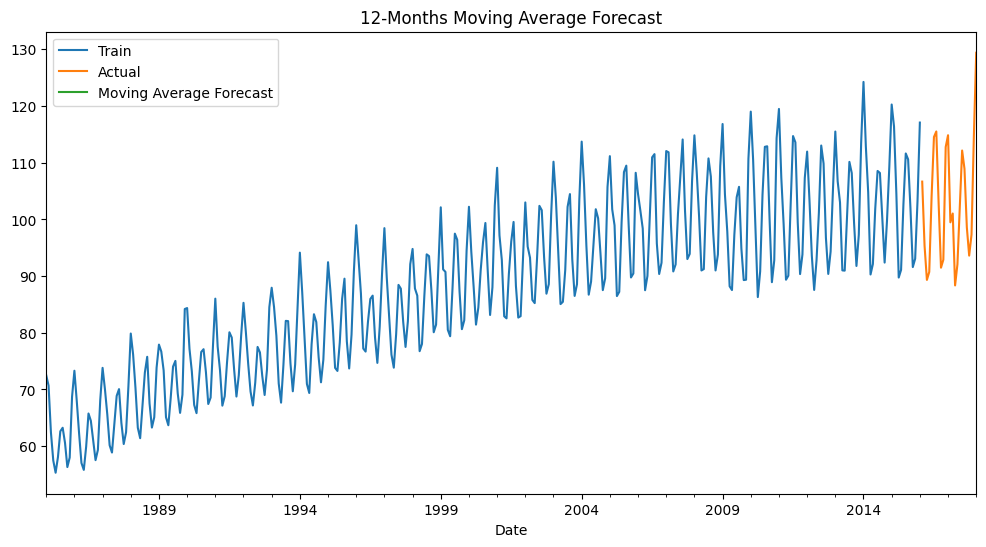

In [6]:
plt.figure(figsize=(12, 6))
df['Electricity'].iloc[:-test_size].plot(label='Train')
df['Electricity'].iloc[-test_size:].plot(label='Actual')
plt.plot(df.iloc[-test_size:].index, predictions, label='Moving Average Forecast')
plt.title(f'{window_size}-Months Moving Average Forecast')
plt.legend()
plt.show()